In [66]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt
import networkx as nx

def create_Lap(edgelist,n):
    """
    this function creates the Laplacian Matrix
    
    Argument: edgelist, number of entry in the row and column
    
    Return: Laplacian Matrix
    """
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

def plot_eigenval(L,edgelist):
    (eigvalue, eigvec) = np.linalg.eig(L)
    eig_vals_sorted = np.sort(eigvalue)
    plt.plot(eig_vals_sorted)
    plt.show()

def plot_edge_eigenvec(L, p, q, edgelist):
    (eigvalue, eigvec) = np.linalg.eig(L)
    sort_eigvec = eigvec[:, eigvalue.argsort()]
    vec1 = sort_eigvec[:, p-1]
    vec2 = sort_eigvec[:, q-1]
    plt.scatter(vec1, vec2)
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()

In [67]:
#Generagting Lapalcian with Sparse Matrix
def create_Lap_sparse(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    L = sparse.csr_matrix(L)
    return L

def plot_eigenval_sparse(L,edgelist):
    vals, vecs = sparse.linalg.eigsh(L, k = L.shape[1] - 1, which = 'SM')
    plt.plot(vals)
    plt.show()
    
#Plot edges on pth and qth eigenvectors
def plot_edge_eigenvec_sparse(L, p, q, edgelist):
    """
    this function both scatters the pth and qth eigenvectors of sparse Laplacian Matrix
    
    and plots edges accodring to edgelist 
    
    Argument: Sparse Lapacian Matrix, pth eigenvectors in sorted sparse matrix, qth eigenvectors in sorted sparse matrix
    
    Notes: eigenvectors are sorted by lowest to highes values of eigenvalues in the sparse matrix
    """
    vals, vecs = sparse.linalg.eigsh(L, k = L.shape[1] - 1, which = 'SM')
    plt.scatter(vecs[:,p-1],vecs[:,q-1])
    vec1 = vecs[:,p-1]
    vec2 = vecs[:,q-1]
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()

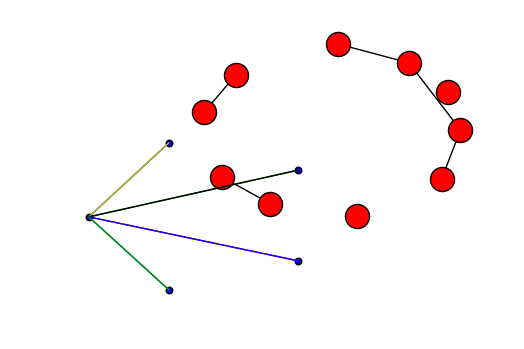

In [68]:
#gnm_random_graph(n, m)
#Produces a graph picked randomly out of the set of all graphs with n nodes and m edges
n = 10
m = 5
g = nx.gnm_random_graph(n, m)
nx.draw(g)
plt.show()

edgelist = g.edges()
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

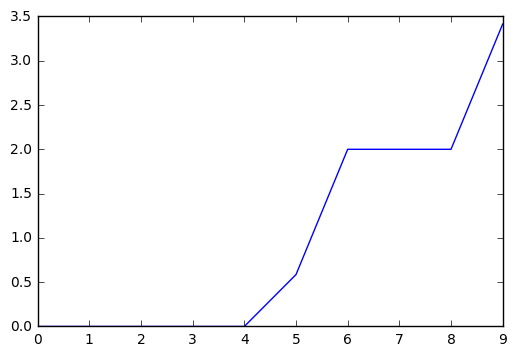

In [69]:
plot_eigenval(L, edgelist)

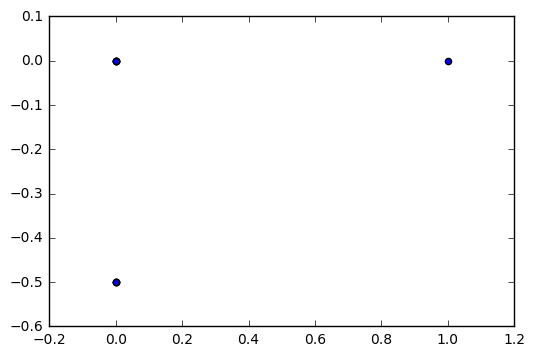

In [70]:
plot_edge_eigenvec(L, 4, 5, edgelist)

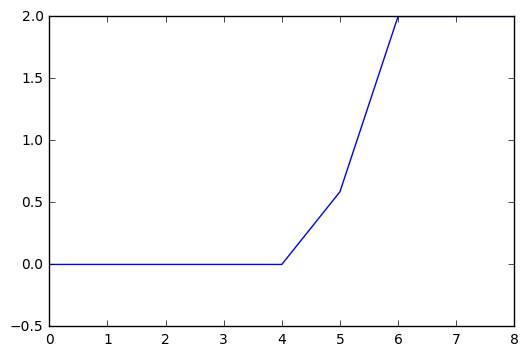

In [71]:
plot_eigenval_sparse(L_S, edgelist)

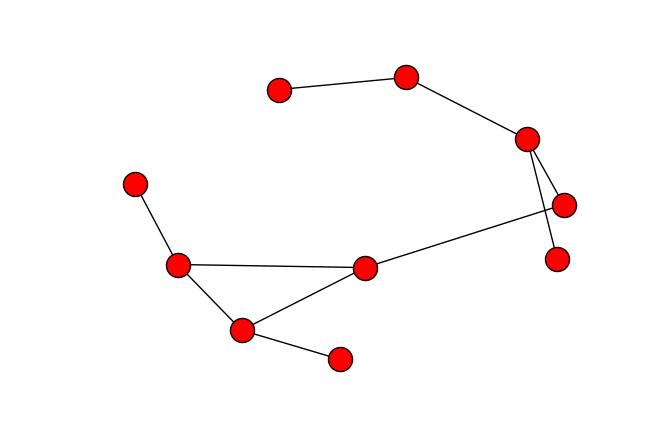

In [92]:
#watts_strogatz_graph(n, k, p)
#n: number of nodes
#k: each node is connected to k nearest neighbors in ring topology
#p: probability of rewiring each edge
n = 10
w = nx.watts_strogatz_graph(n, 3, 1)
nx.draw(w)
plt.show()

edgelist = w.edges()
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

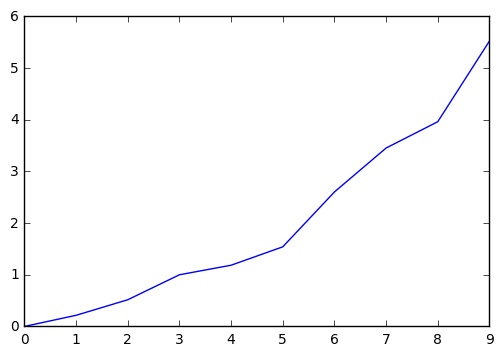

In [89]:
plot_eigenval(L, edgelist)

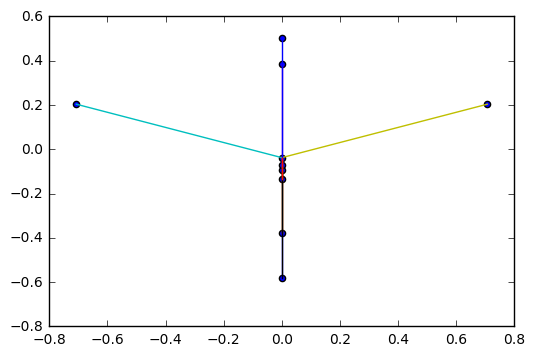

In [90]:
plot_edge_eigenvec(L, 4, 5, edgelist)

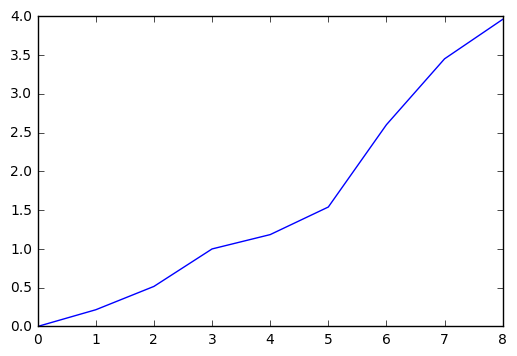

In [91]:
plot_eigenval_sparse(L_S, edgelist)

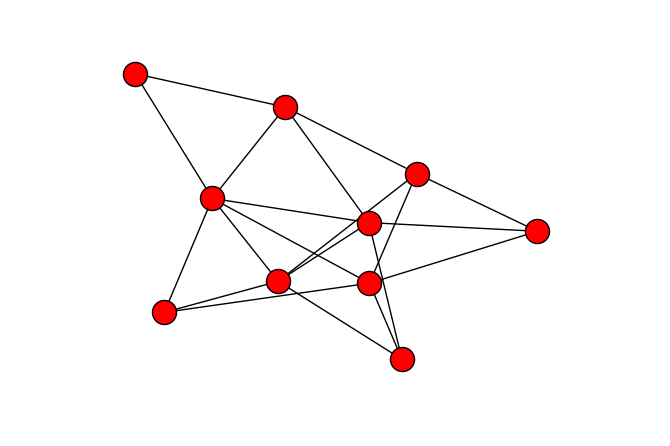

In [76]:
#connected_watts_strogatz_graph(n, k, p, tries)
#n: number of nodes
#k: each node is connected to k nearest neighbors in ring topology
#p: probability of rewiring each edge
#tries: number of attempts to generate a connected graph
n = 10
k = 4
p = 1
tries = 100
c = nx.connected_watts_strogatz_graph(n, k, p, tries)
nx.draw(c)
plt.show()

edgelist = c.edges()
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

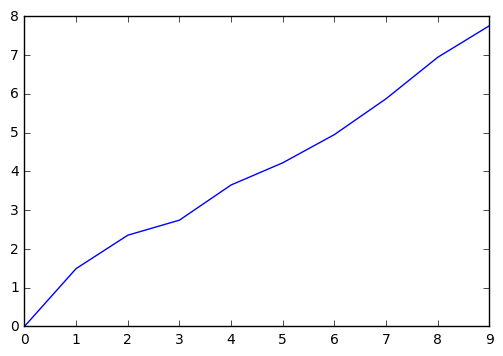

In [77]:
plot_eigenval(L, edgelist)

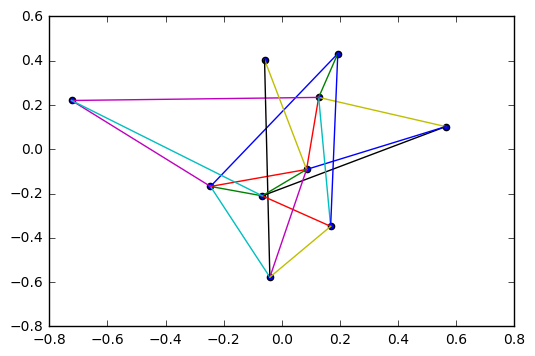

In [78]:
plot_edge_eigenvec(L, 4, 5, edgelist)

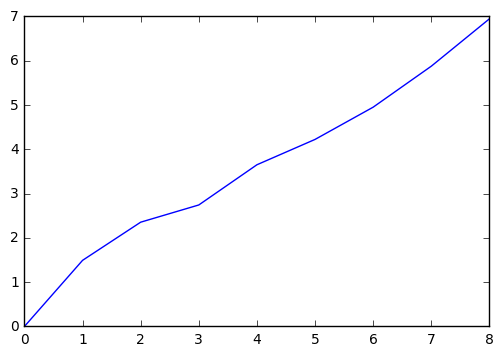

In [79]:
plot_eigenval_sparse(L_S, edgelist)

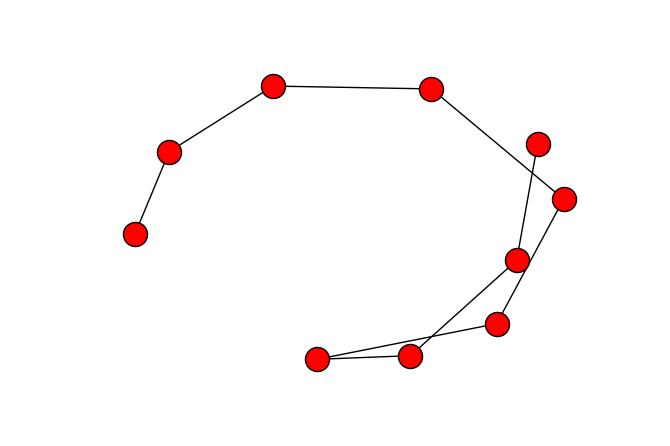

In [80]:
# path graph
n = 10
a = nx.path_graph(n)
nx.draw(a)
plt.show()

edgelist = a.edges()
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

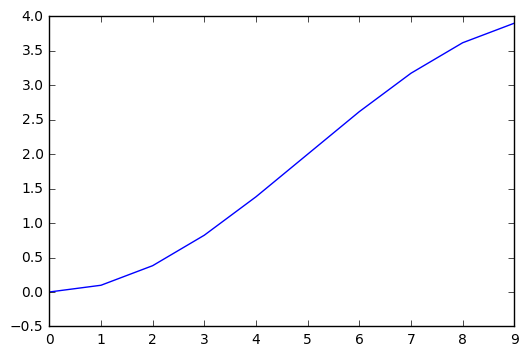

In [81]:
plot_eigenval(L, edgelist)

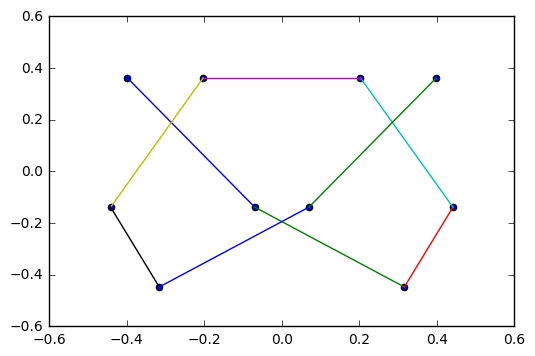

In [82]:
plot_edge_eigenvec(L, 4, 5, edgelist)

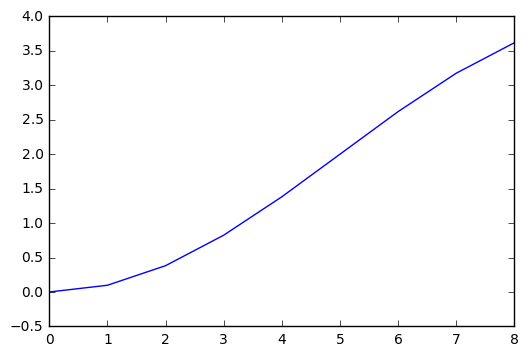

In [83]:
plot_eigenval_sparse(L_S, edgelist)

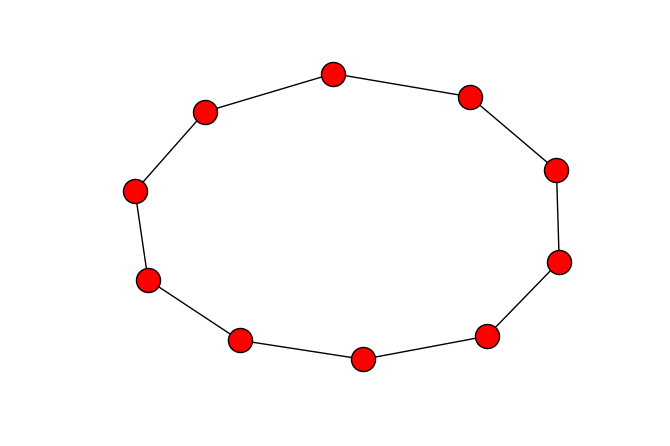

In [84]:
#clycle graph
n = 10
b = nx.cycle_graph(n)
nx.draw(b)
plt.show()

edgelist = b.edges()
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

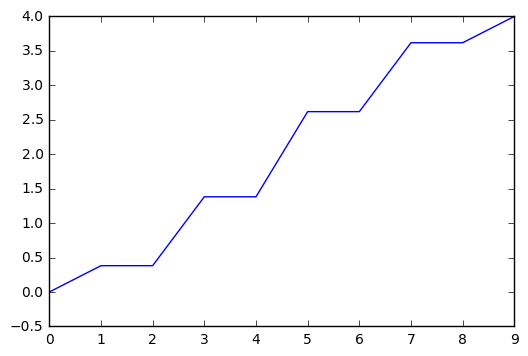

In [85]:
plot_eigenval(L, edgelist)

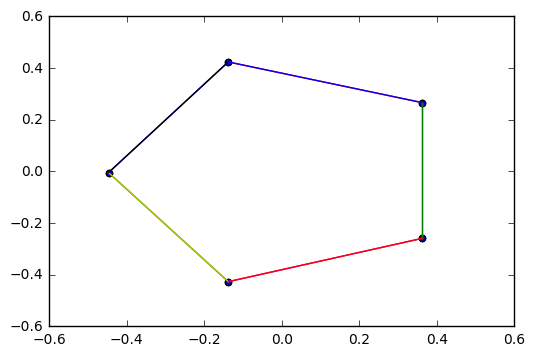

In [86]:
plot_edge_eigenvec(L, 4, 5, edgelist)

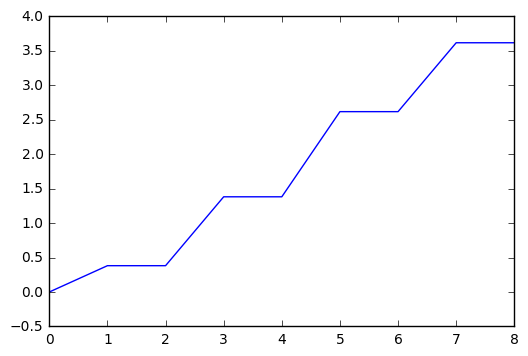

In [87]:
plot_eigenval_sparse(L_S, edgelist)